# Assignment-1(Q1) 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# a)

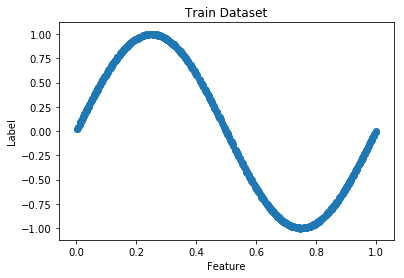

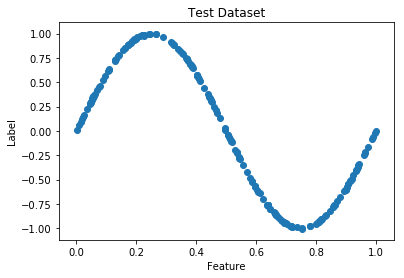

In [3]:
#Train_Dataset
fig, ax = plt.subplots()
ax.scatter(train['Feature'], train[' Label'])
ax.set_title('Train Dataset')
ax.set_xlabel('Feature')
ax.set_ylabel('Label')

plt.pause(0.001)
#Test_Dataset
fig, ax = plt.subplots()
ax.scatter(test['Feature'], test[' Label'])
ax.set_title('Test Dataset')
ax.set_xlabel('Feature')
ax.set_ylabel('Label')

# b)

In [4]:
X_train = train['Feature']
y_train = np.array(train[' Label'])
X_test = test['Feature']
y_test = np.array(test[' Label'])

In [5]:
def hypothesis_function(x_temp, theta):
    h = np.matmul(x_temp, theta)
    return h

def grad_cost_function(x_train, y_train, theta, k):
    m = len(y_train)
    h = hypothesis_function(x_train, theta)
    grad_cost = np.array([np.sum((h - y_train)*x_train[:, i])*(1/m) for i in range(k+1)])
    return grad_cost

def gradient_descent(x_train, y_train, alpha, N, theta, k):
    for _ in range(N):
        grad_cost = grad_cost_function(x_train, y_train, theta, k)
        temp = alpha * grad_cost
        theta = theta - temp
    return theta

def predict_train(x_train, y_train, alpha, N, k):
    
    theta = np.array([0 for i in range(k+1)])
    theta = gradient_descent(x_train, y_train, alpha, N, theta, k)
    y_train_predicted = hypothesis_function(x_train, theta)
    return y_train_predicted

def predict_test(X_train, y_train, X_test, alpha, N, k):
    x_train = np.array([X_train**i for i in range(k+1)]).T
    x_test = np.array([X_test**i for i in range(k+1)]).T
    theta = np.array([0 for i in range(k+1)])
    theta_trained = gradient_descent(x_train, y_train, alpha, N, theta, k)
    y_test_pred = hypothesis_function(x_test, theta_trained)
    return y_test_pred

def squared_error(X_train, X_test, y_train, y_test, alpha, N, k):
    x_train = np.array([X_train**i for i in range(k+1)]).T
    x_test = np.array([X_test**i for i in range(k+1)]).T
    theta = np.array([0 for i in range(k+1)])
    theta = gradient_descent(x_train, y_train, alpha, N, theta, k)
    h_train = hypothesis_function(x_train, theta)
    m_train = len(y_train)
    J_train = (1/(2*m_train)) * np.sum((h_train - y_train)**2)
    h_test = hypothesis_function(x_test, theta)
    m_test = len(y_test)
    J_test = (1/(2*m_test)) * np.sum((h_test - y_test)**2)
    return (J_train, J_test)
    
def plot_train(X_train, y_train, alpha, N, k):
    x_train = np.array([X_train**i for i in range(k+1)]).T
    plt.scatter(X_train, y_train, label = 'Real values')
    plt.scatter(X_train, predict_train(x_train, y_train, alpha, N, k), label = 'Predicted Values')
    plt.legend()
    
def plot_test(X_train, y_train, X_test, y_test, alpha, N, k):    
    plt.scatter(X_test, y_test, label = 'Real values')
    y_pred = predict_test(X_train, y_train, X_test, alpha, N, k)
    plt.scatter(X_test, y_pred, label = 'Predicted values')
    plt.legend()

In [6]:
training_errors = []
no_of_iterations = []
for N in range(10000, 500000, 100000):
    training_errors.append(squared_error(X_train, X_test, y_train, y_test, 0.05, N, 4)[0])
    no_of_iterations.append(N)

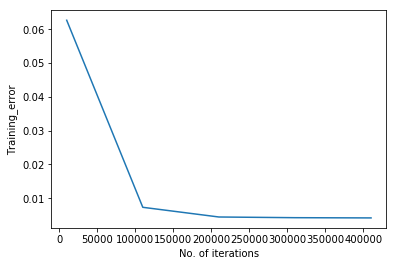

In [7]:
plt.plot(no_of_iterations, training_errors)
plt.xlabel("No. of iterations")
plt.ylabel("Training_error")

## Weights for different polynomials

In [8]:
for i in range(1, 10):
    x_train = np.array([X_train**j for j in range(i+1)]).T
    x_test = np.array([X_test**j for j in range(i+1)]).T
    theta = np.array([0 for j in range(i+1)])
    weight = gradient_descent(x_train, y_train, 0.05, 100000, theta, i)
    print("Weights for " + str(i) + " degree polynomial = " + str(weight))

Weights for 1 degree polynomial = [ 0.91925226 -1.86080448]
Weights for 2 degree polynomial = [ 0.9950247  -2.32144019  0.45585199]
Weights for 3 degree polynomial = [  0.59529639   2.98713202 -13.40161076   9.4665165 ]
Weights for 4 degree polynomial = [  0.26400082   5.48822207 -12.93311948  -3.42731985  10.7813582 ]
Weights for 5 degree polynomial = [ 0.22457854  5.10172042 -9.69461225 -5.0229042   2.24173032  7.5869297 ]
Weights for 6 degree polynomial = [ 0.28197445  4.32219686 -8.01484017 -4.23256807  0.71164404  3.43519119
  4.01448507]
Weights for 7 degree polynomial = [ 0.32251275  3.9756493  -7.677343   -3.74190306  0.82640802  2.90372354
  2.74764342  1.1477701 ]
Weights for 8 degree polynomial = [ 0.32976753  4.00343613 -7.89791762 -3.78332969  0.98406186  3.18525153
  3.07922845  1.47603503 -0.94478712]
Weights for 9 degree polynomial = [ 0.31443435  4.21152379 -8.20391593 -4.11524032  0.88155064  3.40386001
  3.63163188  2.34044688  0.19682591 -2.34058817]


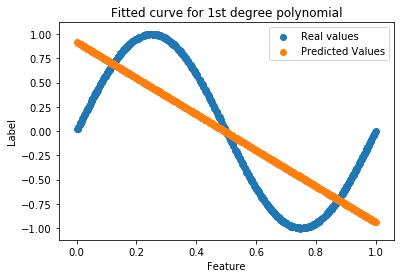

In [9]:
plot_train(X_train, y_train, 0.05, 100000, 1)
plt.title('Fitted curve for 1st degree polynomial')
plt.xlabel('Feature')
plt.ylabel('Label')

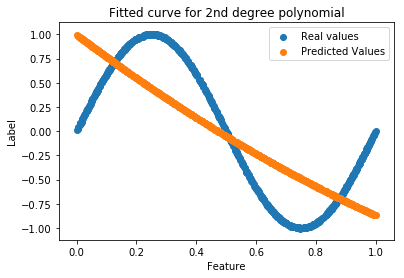

In [10]:
plot_train(X_train, y_train, 0.05, 100000, 2)
plt.title('Fitted curve for 2nd degree polynomial')
plt.xlabel('Feature')
plt.ylabel('Label')

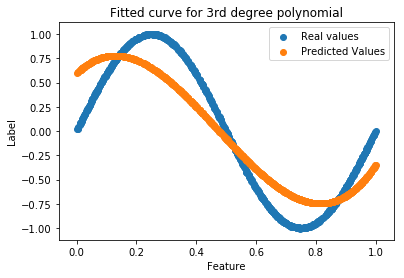

In [11]:
plot_train(X_train, y_train, 0.05, 100000, 3)
plt.title('Fitted curve for 3rd degree polynomial')
plt.xlabel('Feature')
plt.ylabel('Label')

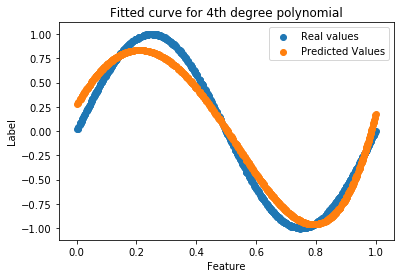

In [12]:
plot_train(X_train, y_train, 0.05, 100000, 4)
plt.title('Fitted curve for 4th degree polynomial')
plt.xlabel('Feature')
plt.ylabel('Label')

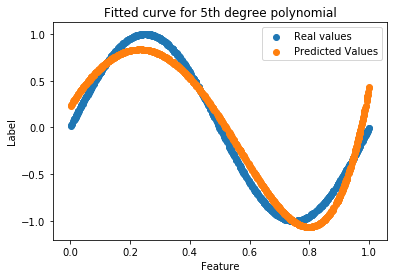

In [13]:
plot_train(X_train, y_train, 0.05, 100000, 5)
plt.title('Fitted curve for 5th degree polynomial')
plt.xlabel('Feature')
plt.ylabel('Label')

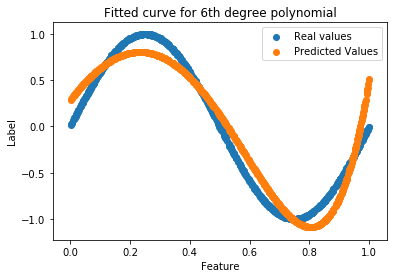

In [14]:
plot_train(X_train, y_train, 0.05, 100000, 6)
plt.title('Fitted curve for 6th degree polynomial')
plt.xlabel('Feature')
plt.ylabel('Label')

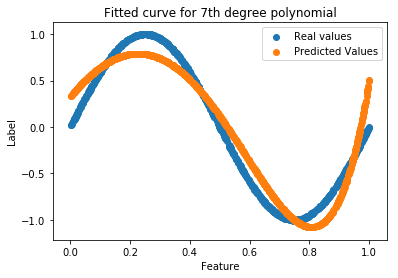

In [15]:
plot_train(X_train, y_train, 0.05, 100000, 7)
plt.title('Fitted curve for 7th degree polynomial')
plt.xlabel('Feature')
plt.ylabel('Label')

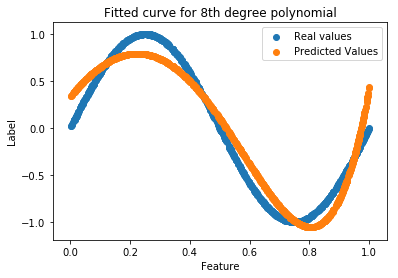

In [16]:
plot_train(X_train, y_train, 0.05, 100000, 8)
plt.title('Fitted curve for 8th degree polynomial')
plt.xlabel('Feature')
plt.ylabel('Label')

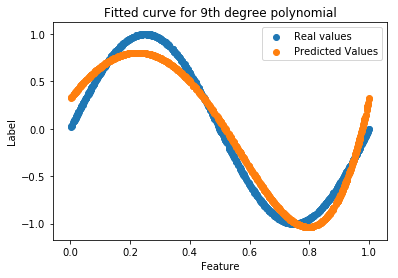

In [17]:
plot_train(X_train, y_train, 0.05, 100000, 9)
plt.title('Fitted curve for 9th degree polynomial')
plt.xlabel('Feature')
plt.ylabel('Label')

## Labels on test data 

In [18]:
for i in range(1, 10):
    predicted = predict_test(X_train, y_train, X_test, 0.05, 100000, i)
    print(str(i) + " degree polynomial"  )
    print("Predicted labels = " + str(predicted))

1 degree polynomial
Predicted labels = [ 0.25789549  0.0794071   0.68146953 -0.4482836   0.0899488  -0.41347602
 -0.76200019 -0.26800821  0.2252068  -0.09403402 -0.32046812  0.20888251
 -0.26950824  0.52281474 -0.38967261  0.62919614  0.81327715  0.6716959
 -0.21106024  0.61983377 -0.53038993  0.23500413 -0.83064702 -0.0051564
  0.86959006 -0.37233793 -0.11661534  0.28747926 -0.16893138  0.49978986
  0.23510965 -0.78685287 -0.30646645  0.77527567  0.72132216 -0.3814665
  0.15793023 -0.81644529 -0.31170468 -0.36045166  0.83548752 -0.07798086
  0.82253597 -0.83335882  0.5053504  -0.27178284  0.31052843  0.20006317
 -0.48017263 -0.00487385  0.23857182  0.16935566 -0.78167674  0.1505639
 -0.3378136   0.19450242  0.56421002 -0.28372001 -0.03409097  0.26616317
 -0.86727513  0.83250903 -0.78306038  0.2135275  -0.35115396 -0.56691183
  0.78970501  0.83017829  0.54251688  0.16812672  0.23472429 -0.18818943
  0.80311685  0.82991185  0.916322    0.547922   -0.40936756 -0.9181242
  0.09463963 -0.7

5 degree polynomial
Predicted labels = [ 0.66647622  0.32565358  0.70857371 -0.97546296  0.3499087  -0.92014593
 -0.72276125 -0.59783736  0.61628206 -0.12270317 -0.72742767  0.58900181
 -0.6016932   0.83083233 -0.87646167  0.76726044  0.4827842   0.72090479
 -0.44668888  0.77587445 -1.05677668  0.63195453 -0.39534913  0.11675685
  0.3537366  -0.84199089 -0.18529936  0.70662075 -0.33081636  0.83465391
  0.63212043 -0.61899022 -0.69400047  0.55905221  0.65189749 -0.86040822
  0.49486412 -0.47381447 -0.70661548 -0.8171699   0.43414166 -0.07848624
  0.46286755 -0.37969485  0.83405492 -0.60752528  0.73430189  0.57366761
 -1.01597378  0.11749159  0.63752922  0.51711795 -0.64193237  0.48017911
 -0.76746596  0.56378793  0.81505864 -0.6378269   0.04047239  0.6782092
 -0.16502407  0.4408368  -0.63586931  0.59691107 -0.79712676 -1.06608108
  0.53113731  0.44603892  0.8247521   0.5147552   0.63151426 -0.38405782
  0.50404186  0.44663153  0.23258829  0.8226308  -0.91292589  0.22661673
  0.36055772 

9 degree polynomial
Predicted labels = [ 6.32405544e-01  3.04205190e-01  7.10423220e-01 -9.54429458e-01
  3.27567563e-01 -9.01960903e-01 -7.01630954e-01 -5.90934322e-01
  5.83941880e-01 -1.29305547e-01 -7.16560753e-01  5.57654706e-01
 -5.94677515e-01  8.03219672e-01 -8.60194698e-01  7.56882606e-01
  5.26928180e-01  7.20273625e-01 -4.44074076e-01  7.63574574e-01
 -1.02914511e+00  5.99057695e-01 -4.01647109e-01  1.02621965e-01
  4.20912653e-01 -8.27101037e-01 -1.90059875e-01  6.71327076e-01
 -3.31432963e-01  8.04583637e-01  5.99217767e-01 -6.05341096e-01
 -6.84198584e-01  5.89315720e-01  6.64797705e-01 -8.44795304e-01
  4.67062141e-01 -4.72564907e-01 -6.96415962e-01 -8.03214408e-01
  4.87022159e-01 -8.64177845e-02  5.10597984e-01 -3.87565497e-01
  8.04538913e-01 -6.00338747e-01  6.98314685e-01  5.42888711e-01
 -9.92319879e-01  1.03332234e-01  6.04437470e-01  4.88469978e-01
 -6.26523663e-01  4.52935836e-01 -7.55268733e-01  5.33377958e-01
  7.92973643e-01 -6.29742820e-01  2.88308169e-02  6

## Test error 

In [19]:
for i in range(1, 10):
    J = squared_error(X_train, X_test, y_train, y_test, 0.05, 100000, i)
    
    print("Test error for " + str(i) + " degree polynomial= " + str(J[1]))
    print("\n")

Test error for 1 degree polynomial= 0.0955638401564891


Test error for 2 degree polynomial= 0.09606879534881195


Test error for 3 degree polynomial= 0.03684453395697403


Test error for 4 degree polynomial= 0.008604132308976654


Test error for 5 degree polynomial= 0.00927502055104146


Test error for 6 degree polynomial= 0.01288981265343829


Test error for 7 degree polynomial= 0.014121340701347287


Test error for 8 degree polynomial= 0.012835256653625123


Test error for 9 degree polynomial= 0.010224607405985728




##########################################################################################################  